In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("bank-full.csv", sep = ";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df["job"].unique(), df["month"].unique(), df["marital"].unique(), df["education"].unique(), df["default"].unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['no', 'yes'], dtype=object))

In [5]:
df["housing"].unique(), df["loan"].unique(), df["contact"].unique(), df["poutcome"].unique()

(array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array(['unknown', 'failure', 'other', 'success'], dtype=object))

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df1 = pd.get_dummies(data = df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first= True)

In [8]:
df1.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
df1["y"] = np.where(df["y"] == 'no', 0, 1)

In [10]:
pos_rows = df1[df1['y'] == 1]
neg_rows = df1[df1['y'] == 0]
num = df1.y.value_counts().min()
num

5289

In [11]:
pos_rows = pos_rows.sample(n = num)
neg_rows = neg_rows.sample(n = num)
df_eq = pd.concat([pos_rows, neg_rows], axis = 0)
df_eq.shape

(10578, 43)

In [12]:
y = df_eq["y"]
x = df_eq.drop(['y'], axis = 1)
y.shape, x.shape

((10578,), (10578, 42))

In [13]:
classifier = LogisticRegression()
classifier.fit(x,y)


/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = classifier.predict(x)

In [15]:
conf_matrix = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5289
           1       0.81      0.78      0.79      5289

    accuracy                           0.80     10578
   macro avg       0.80      0.80      0.80     10578
weighted avg       0.80      0.80      0.80     10578



In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8462, 42), (2116, 42), (8462,), (2116,))

In [17]:
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8002836208934058

In [18]:
classifier.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [19]:
classifier.score(X_test, y_test)

0.7967863894139886

Text(50.722222222222214, 0.5, 'Actual')

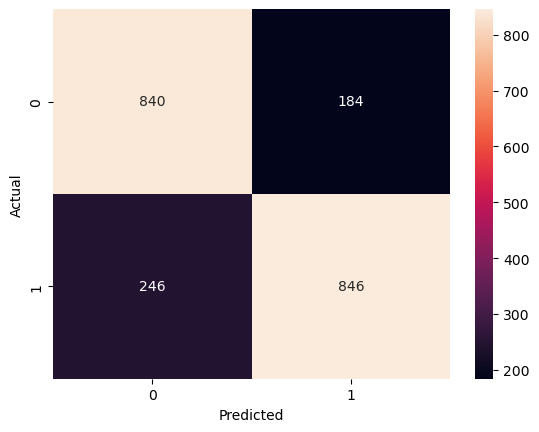

In [20]:
cm = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(cm, annot=True, fmt = '.0f', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

###### Finding the area under the ROC curve

In [21]:
fpr, tpr, _ = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)

In [22]:
auc

0.7977878615995462

Text(0, 0.5, 'True Positive Rate')

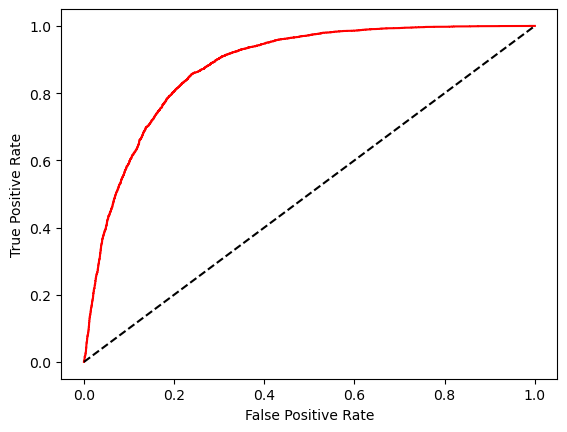

In [23]:
plt.plot(fpr,tpr,color = 'red', label = 'logit model(area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')